In [1]:
# імпортуємо потрібні бібліотеки для візуалізації та розрахунків
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [2]:
os.chdir('C:\\Users\\Лара\\Desktop\\SD\\')

In [3]:
#читаємо csv-файл та виводимо перші 5 стрічок
dt = pd.read_csv('Zr.csv', sep=",", header = 1, index_col = False)
dt.head()

,code,attributes,period,average_all,salary_men,salary_woman,curs
0,1.0,У середньому по економіці,2015 Q1,3641,4238,3122,2339
1,2.0,Сільське господарство лісове господарство та р...,2015 Q1,2670,2762,2458,2339
2,2.1,сільське господарство,2015 Q1,2522,2592,2378,2339
3,3.0,Промисловість,2015 Q1,4236,4688,3434,2339
4,4.0,Будівництво,2015 Q1,2957,2993,2807,2339


# Описова статистика

In [4]:
# виведемо статистичні дані 
dt[['average_all', 'salary_men', 'salary_woman', 'curs']].describe()

,average_all,salary_men,salary_woman,curs
count,675.000000,675.000000,675.000000,675.000000
mean,8743.315556,9678.589630,7845.134815,2598.480000
std,5251.913451,6121.940058,4301.252963,149.844432
min,1983.000000,2317.000000,1844.000000,2339.000000
25%,5280.000000,5834.500000,4834.000000,2526.000000
50%,7603.000000,8268.000000,7020.000000,2618.000000
75%,10713.500000,11793.500000,9672.500000,2731.000000
max,39439.000000,47465.000000,32116.000000,2827.000000


array([[<AxesSubplot:title={'center':'average_all'}>,
        <AxesSubplot:title={'center':'salary_men'}>],
       [<AxesSubplot:title={'center':'salary_woman'}>,
        <AxesSubplot:title={'center':'curs'}>]], dtype=object)

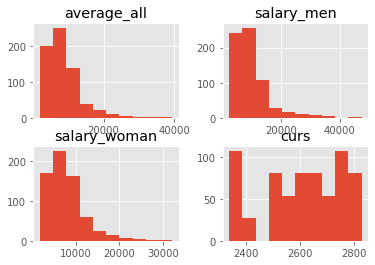

In [5]:
# побудуємо гістограми
dt[['average_all', 'salary_men', 'salary_woman', 'curs']].hist()

array([[<AxesSubplot:title={'center':'average_all'}>,
        <AxesSubplot:title={'center':'salary_men'}>],
       [<AxesSubplot:title={'center':'salary_woman'}>,
        <AxesSubplot:title={'center':'curs'}>]], dtype=object)

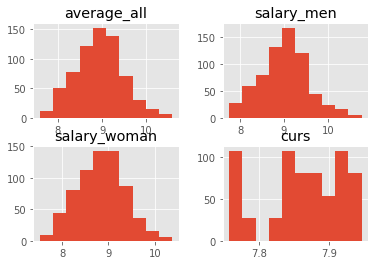

In [6]:
# гістограми даних після логарифмування
np.log(dt[['average_all', 'salary_men', 'salary_woman', 'curs']]).hist()

In [7]:
# імпортуємо gaussian_kde для ядерної оцінки плотності
from scipy.stats.kde import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist

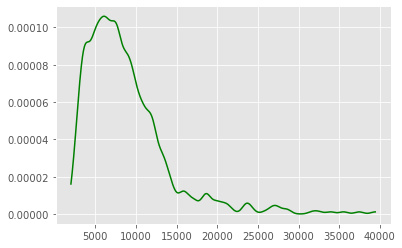

In [8]:
my_density = gaussian_kde(dt['average_all'], bw_method = 0.1)

#график
x = linspace(min(dt['average_all']), max(dt['average_all']), 1000)
plot(x, my_density(x), 'g')

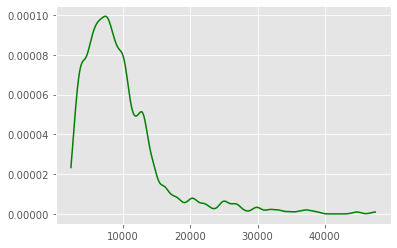

In [9]:
my_density1 = gaussian_kde(dt['salary_men'], bw_method = 0.1)

#график
x = linspace(min(dt['salary_men']), max(dt['salary_men']), 1000)
plot(x, my_density1(x), 'g')

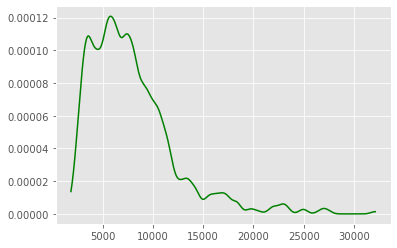

In [10]:
my_density2 = gaussian_kde(dt['salary_woman'], bw_method = 0.1)

#график
x = linspace(min(dt['salary_woman']), max(dt['salary_woman']), 1000)
plot(x, my_density2(x), 'g')

In [11]:
#Подивимося на викиди
dt_1 = dt[(dt['attributes'] == 'авіаційний транспорт')]
dt_2 = dt_1[['period','average_all']]
dt_2.head()

,period,average_all
9,2015 Q1,16122
36,2015 Q2,18389
63,2015 Q3,19120
90,2015 Q4,20312
117,2016 Q1,20822


In [12]:
dt_2.index = range(25)
dt_2.code = dt_2.index

C:\Users\570B~1\AppData\Local\Temp/ipykernel_34512/2463231451.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dt_2.code = dt_2.index


In [13]:
dt_2.head()

,period,average_all
0,2015 Q1,16122
1,2015 Q2,18389
2,2015 Q3,19120
3,2015 Q4,20312
4,2016 Q1,20822


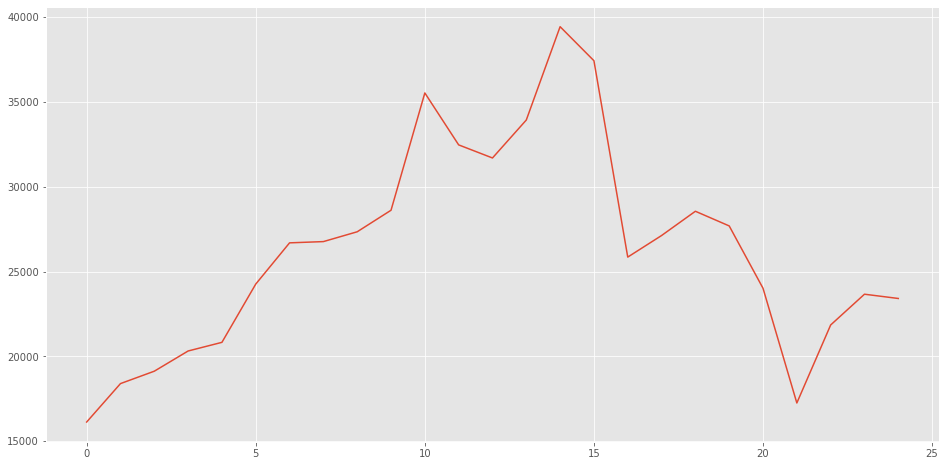

In [14]:
col_num = 1
dt_3 = dt_2[dt_2.columns[col_num]]

plt.figure(figsize=(16,8))
dt_3.plot()
plt.show()

In [15]:
df = dt[(dt['attributes'] == 'Промисловість')]
df_1 = df[['period','average_all']]
df_1.head()

,period,average_all
3,2015 Q1,4236
30,2015 Q2,4658
57,2015 Q3,5011
84,2015 Q4,5269
111,2016 Q1,5348


In [16]:
df_1.index = range(25)
df_1.code = df_1.index

df_1.head()

C:\Users\570B~1\AppData\Local\Temp/ipykernel_34512/2035383709.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_1.code = df_1.index


,period,average_all
0,2015 Q1,4236
1,2015 Q2,4658
2,2015 Q3,5011
3,2015 Q4,5269
4,2016 Q1,5348


In [17]:
df_1.describe()

,average_all
count,25.000000
mean,8959.720000
std,3150.407467
min,4236.000000
25%,5978.000000
50%,8646.000000
75%,11875.000000
max,13855.000000


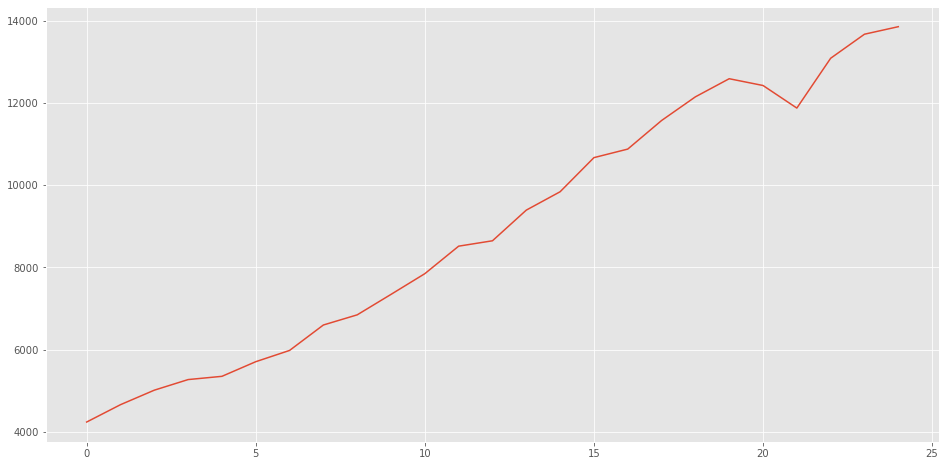

In [18]:
c_num = 1
df_2 = df_1[df_1.columns[c_num]]

plt.figure(figsize=(16,8))
df_2.plot()
plt.show()

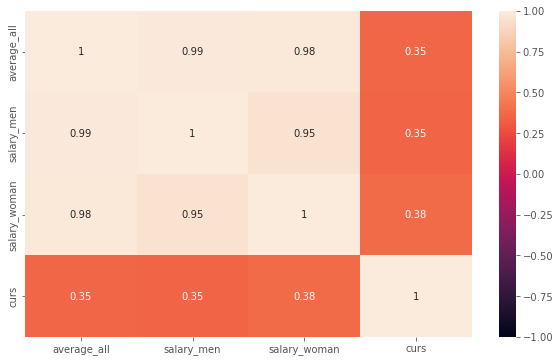

In [19]:
#теплова карта кореляцією
from scipy import stats
import seaborn as sns
import math
dt_corr = dt[['average_all', 'salary_men', 'salary_woman', 'curs']].corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(dt_corr, annot = True, vmin = -1, vmax = 1)
bottom, top = ax.get_ylim()

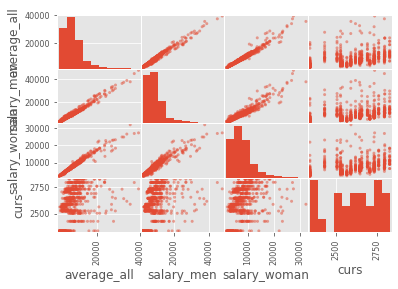

In [22]:
#матриця
from pandas.plotting import scatter_matrix
scatter_matrix(dt[['average_all', 'salary_men', 'salary_woman', 'curs']]);

In [23]:
dt1 = pd.read_csv('Zr.csv', sep=",", header = 1, index_col = 0)
dt1.head()

,attributes,period,average_all,salary_men,salary_woman,curs
code,,,,,,
1.0,У середньому по економіці,2015 Q1,3641,4238,3122,2339
2.0,Сільське господарство лісове господарство та р...,2015 Q1,2670,2762,2458,2339
2.1,сільське господарство,2015 Q1,2522,2592,2378,2339
3.0,Промисловість,2015 Q1,4236,4688,3434,2339
4.0,Будівництво,2015 Q1,2957,2993,2807,2339


In [24]:
# видаляємо викиди
dt1 = dt1.drop([6.3])
dt1 = dt1.drop([9])

In [25]:
# перевіряємо чи видалилися
print(len(dt1))

625


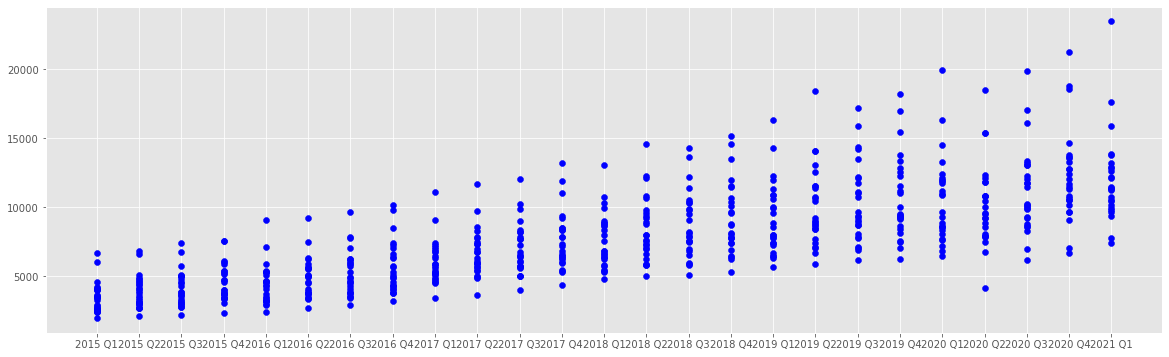

In [26]:
plt.figure(figsize=(20,6))
plt.scatter(dt1.period,dt1.average_all, color = 'blue')

<Figure size 1152x576 with 0 Axes>

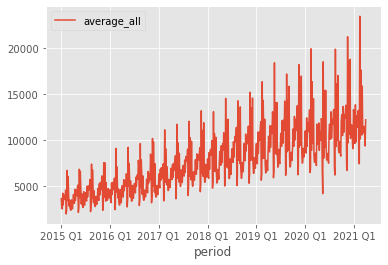

In [27]:
#Подивимося на залежність середньої заробітної плати від часу
Datatime = dt1[['period','average_all']]
Datatime.set_index('period', inplace = True)

#графік залежності
plt.figure(figsize=(16,8))
Datatime.plot()
plt.show()

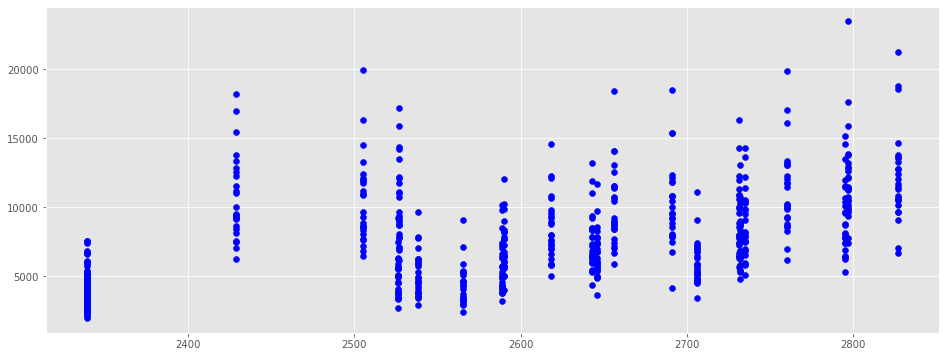

In [28]:
#залежність від курсу долара
plt.figure(figsize=(16,6))
plt.scatter( dt1.curs, dt1.average_all, color = 'blue')

# Лінійна регресійна модель

In [29]:
X = dt1.iloc[:, 2:3].values
y = dt1.iloc[:, -1].values

In [30]:
#розділяємо на навчальну та тестову вибірки для навчання моделі та оцінки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [31]:
#навчаємо нашу модель на навчальній вибірці
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

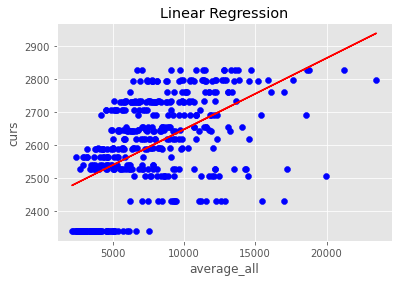

In [32]:
#подивимося на графіку
plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_train, lm.predict(X_train), color = 'red')
plt.title('Linear Regression')
plt.xlabel('average_all')
plt.ylabel('curs')

plt.show()

# Поліноміальна регресійна модель

In [33]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 3)
X_polynom = polynom.fit_transform(X_train)

X_polynom

array([[1.00000000e+00, 7.09200000e+03, 5.02964640e+07, 3.56702523e+11],
       [1.00000000e+00, 1.45790000e+04, 2.12547241e+08, 3.09872623e+12],
       [1.00000000e+00, 1.21310000e+04, 1.47161161e+08, 1.78521204e+12],
       ...,
       [1.00000000e+00, 1.13960000e+04, 1.29868816e+08, 1.47998503e+12],
       [1.00000000e+00, 7.43800000e+03, 5.53238440e+07, 4.11498752e+11],
       [1.00000000e+00, 1.33560000e+04, 1.78382736e+08, 2.38247982e+12]])

In [34]:
#навчаємо модель
Polym = LinearRegression()
Polym.fit(X_polynom, y_train)

LinearRegression()

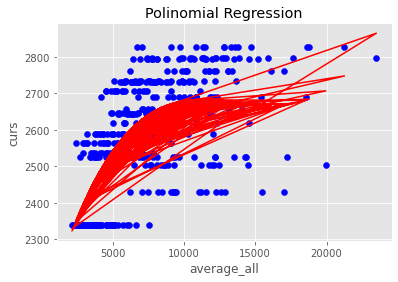

In [35]:
# графік
plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_train, Polym.predict(polynom.fit_transform(X_train)), color = 'red')
plt.title('Polinomial Regression')
plt.xlabel('average_all')
plt.ylabel('curs')

plt.show()

# Оцінка якості моделей

In [36]:
#Лінійна модель
y_predict_slr = lm.predict(X_test)

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Linear Regression: ', r_square)


R-Square Error associated with Linear Regression:  0.19277603596698


In [37]:
#Поліноміальна модель
y_predict_pr = Polym.predict(polynom.fit_transform(X_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is: ', r_square)

R-Square Error associated with Polynomial Regression is:  0.30930697176933386


# Додатковий датасет на якому розглянемо різні моделі

In [38]:
dt = pd.read_csv('DT.csv', sep=",", header = 0, index_col =False)
dt.head()

,period,curs,Agriculture,osvita,Med_15
0,2015 Q1,2339,2522,4102,2390
1,2015 Q2,2339,3125,4641,2682
2,2015 Q3,2339,3387,4863,2785
3,2015 Q4,2339,3448,5339,3465
4,2016 Q1,2565,3200,5269,2948


# Описова статистика

In [39]:
# оцінки міри центральної тенденції та міри варіативності
dt.describe()

,curs,Agriculture,osvita,Med_15
count,25.000000,25.000000,25.000000,25.000000
mean,2598.480000,6511.160000,8743.320000,5722.200000
std,152.821006,2555.382403,2796.615793,2462.244708
min,2339.000000,2522.000000,4102.000000,2390.000000
25%,2526.000000,4265.000000,6215.000000,3467.000000
50%,2618.000000,6296.000000,8824.000000,5422.000000
75%,2731.000000,8730.000000,10995.000000,7081.000000
max,2827.000000,10508.000000,13034.000000,11346.000000


array([[<AxesSubplot:title={'center':'curs'}>,
        <AxesSubplot:title={'center':'Agriculture'}>],
       [<AxesSubplot:title={'center':'osvita'}>,
        <AxesSubplot:title={'center':'Med_15'}>]], dtype=object)

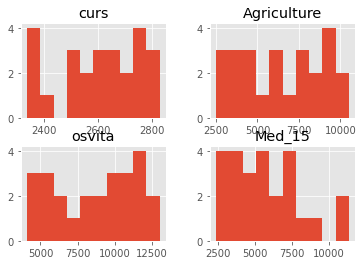

In [40]:
dt.hist()

In [41]:
from scipy.stats.kde import gaussian_kde

from numpy import linspace,hstack
from pylab import plot,show,hist

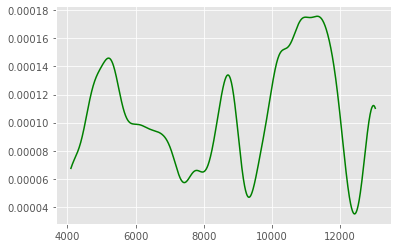

In [42]:
my_density = gaussian_kde(dt['osvita'], bw_method = 0.1)

#график
x = linspace(min(dt['osvita']), max(dt['osvita']), 1000)
plot(x, my_density(x), 'g')

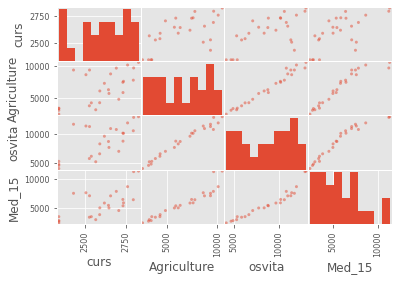

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(dt);

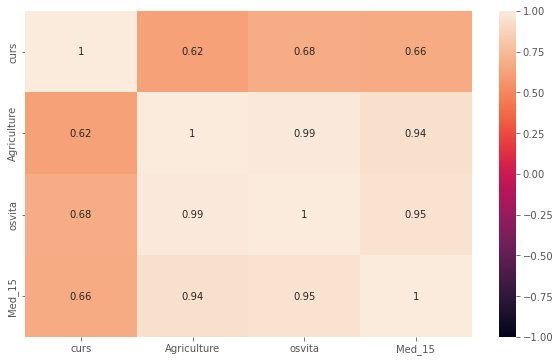

In [44]:
from scipy import stats
import seaborn as sns
import math

dt_corr = dt.corr()
plt.figure(figsize=(10,6))
ax = sns.heatmap(dt_corr, annot = True, vmin = -1, vmax = 1)
bottom, top = ax.get_ylim()

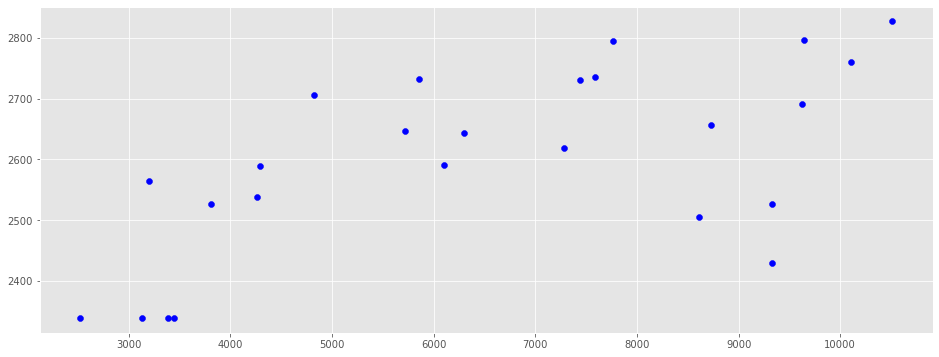

In [45]:
plt.figure(figsize=(16,6))
plt.scatter(dt.Agriculture, dt.curs, color = 'blue')

# Лінійна регресія

In [46]:
X = dt.iloc[:, 2:3].values
y = dt.iloc[:, 1:2].values

In [47]:
#розділяємо на навчальну та тестову вибірки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [48]:
#навчаємо модель
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

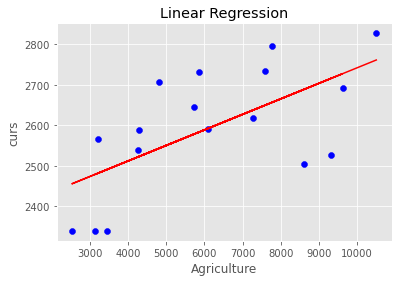

In [49]:
plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_train, lm.predict(X_train), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Agriculture')
plt.ylabel('curs')

plt.show()

# Поліноміальна регресія

In [50]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(X_train)

X_polynom

array([[1.00000000e+00, 1.05080000e+04, 1.10418064e+08],
       [1.00000000e+00, 7.59000000e+03, 5.76081000e+07],
       [1.00000000e+00, 3.12500000e+03, 9.76562500e+06],
       [1.00000000e+00, 6.10000000e+03, 3.72100000e+07],
       [1.00000000e+00, 7.27700000e+03, 5.29547290e+07],
       [1.00000000e+00, 4.81900000e+03, 2.32227610e+07],
       [1.00000000e+00, 4.26500000e+03, 1.81902250e+07],
       [1.00000000e+00, 9.33100000e+03, 8.70675610e+07],
       [1.00000000e+00, 3.20000000e+03, 1.02400000e+07],
       [1.00000000e+00, 5.71400000e+03, 3.26497960e+07],
       [1.00000000e+00, 4.28700000e+03, 1.83783690e+07],
       [1.00000000e+00, 8.60700000e+03, 7.40804490e+07],
       [1.00000000e+00, 3.44800000e+03, 1.18887040e+07],
       [1.00000000e+00, 2.52200000e+03, 6.36048400e+06],
       [1.00000000e+00, 9.62200000e+03, 9.25828840e+07],
       [1.00000000e+00, 7.76600000e+03, 6.03107560e+07],
       [1.00000000e+00, 5.85300000e+03, 3.42576090e+07]])

In [51]:
Polym = LinearRegression()
Polym.fit(X_polynom, y_train)

LinearRegression()

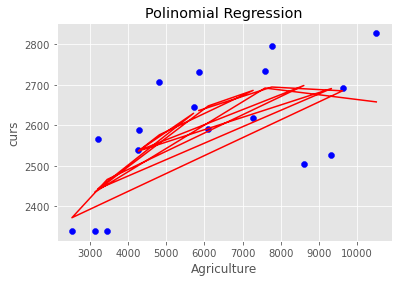

In [52]:
plt.scatter(X_train, y_train, color = 'blue')

plt.plot(X_train, Polym.predict(polynom.fit_transform(X_train)), color = 'red')
plt.title('Polinomial Regression')
plt.xlabel('Agriculture')
plt.ylabel('curs')

plt.show()

# Оцінка Лінійної та Поліноміальної регресії

In [53]:
y_predict_slr = lm.predict(X_test)

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_slr)
print('R-Square Error associated with Linear Regression: ', r_square)

R-Square Error associated with Linear Regression:  0.35840006862963014


In [54]:
y_predict_pr = Polym.predict(polynom.fit_transform(X_test))

from sklearn import metrics
r_square = metrics.r2_score(y_test, y_predict_pr)
print('R-Square Error associated with Polynomial Regression is: ', r_square)

R-Square Error associated with Polynomial Regression is:  0.42734298546023464


# Авторегресія

In [55]:
dt1 = dt[['period', 'Agriculture']]

dt1.set_index('period', inplace = True)

<Figure size 1152x576 with 0 Axes>

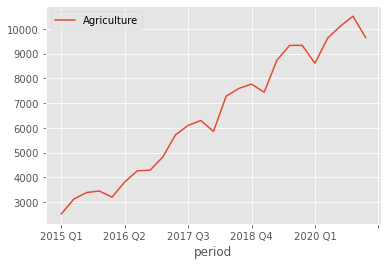

In [56]:
#графік залежності від часу
plt.figure(figsize=(16,8))
dt1.plot()
plt.show()

In [57]:
dt1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Agriculture,25.0,6511.16,2555.382403,2522.0,4265.0,6296.0,8730.0,10508.0


In [58]:
time_series = dt1['Agriculture']

<AxesSubplot:xlabel='period'>

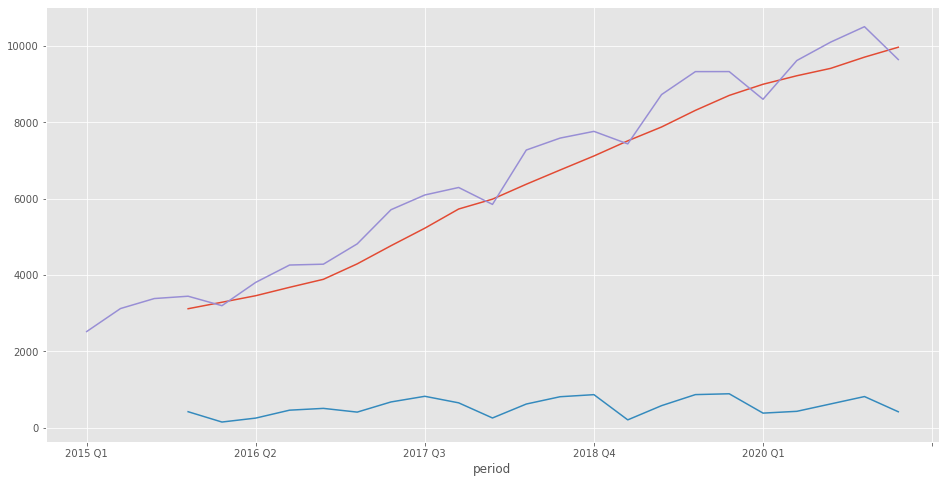

In [59]:
# виведемо на графік середне та середньоквадратичне відхилення
plt.figure(figsize=(16,8))
time_series.rolling(4).mean().plot()
time_series.rolling(4).std().plot()
time_series.plot()

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose

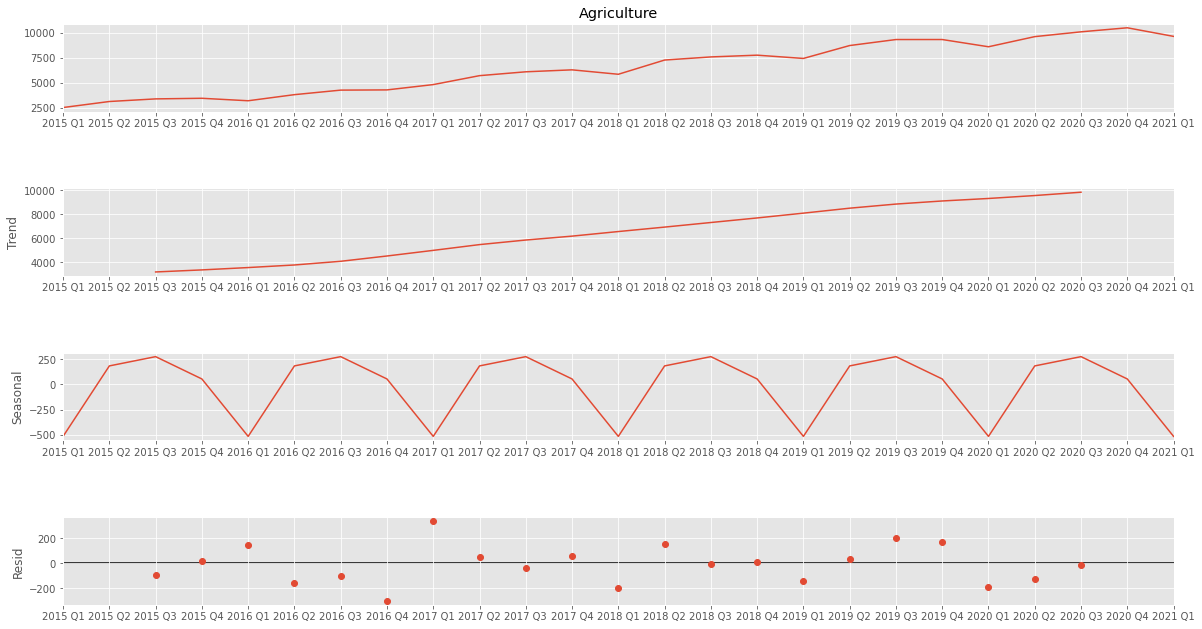

In [61]:
#графіки сезонності, тренд, данні 
decomp = seasonal_decompose(time_series, period = 4)
fig = decomp.plot()
fig.set_size_inches(20,10)

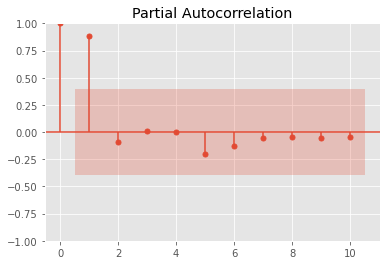

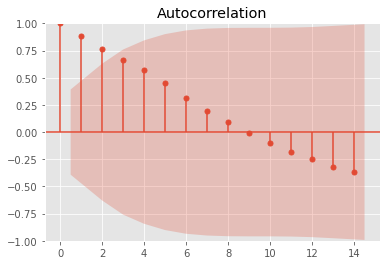

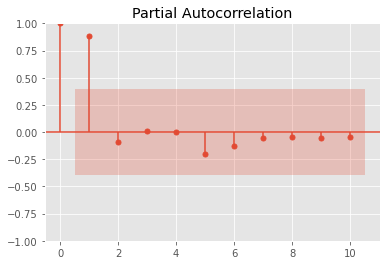

In [62]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(time_series)
plot_pacf(time_series,method = 'ywm', lags = 10)

In [63]:
# converting series to stationary
dt1_diff = dt1.diff(periods=1)

In [64]:
dt1_diff = dt1_diff[1:]
dt1_diff.head()

,Agriculture
period,
2015 Q2,603.0
2015 Q3,262.0
2015 Q4,61.0
2016 Q1,-248.0
2016 Q2,611.0


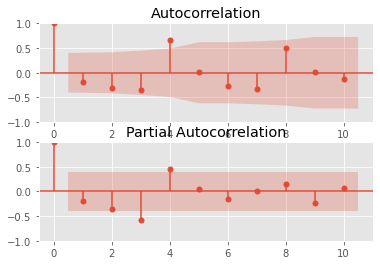

In [65]:
dt2 = dt1_diff
plt.figure()
plt.subplot(211)
plot_acf(dt2, lags=10, ax = plt.gca())
plt.subplot(212)

plot_pacf(dt2, method='ywmle', lags=10, ax = plt.gca())
plt.show()


<AxesSubplot:xlabel='period'>

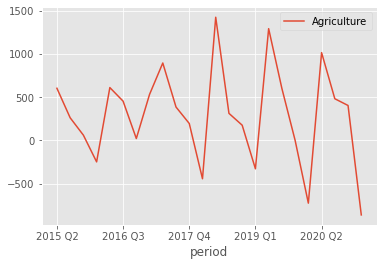

In [66]:
dt1_diff.plot()

In [67]:
#розділяєм на навчальну та тестову
X = dt['Agriculture'].values
train = X[0:17] # 16 data as train data
test = X[16:] # 9 data as test data
predictions = []

In [68]:
train

array([2522, 3125, 3387, 3448, 3200, 3811, 4265, 4287, 4819, 5714, 6100,
       6296, 5853, 7277, 7590, 7766, 7438], dtype=int64)

In [69]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

model_ar = AutoReg(train, lags = 6)
model_ar_fit = model_ar.fit()
#оцінка моделі
print(model_ar_fit.aic)

174.44316692159873


In [73]:
predictions = model_ar_fit.predict(start=16,end=25)
predictions

array([ 7462.31330297,  8645.89742116,  8995.60537749,  9140.98655081,
        8933.40276991,  9951.24487037, 10318.95133284, 10444.63100192,
       10326.60695524, 11190.9892227 ])

In [71]:
test

array([ 7438,  8730,  9331,  9332,  8607,  9622, 10104, 10508,  9647],
      dtype=int64)

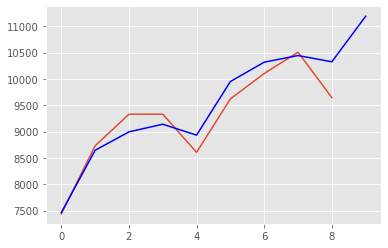

In [74]:
plt.plot(test)
plt.plot(predictions, color = 'blue')

# Аріма

In [75]:
from statsmodels.tsa.arima.model import ARIMA

In [76]:
#Оцінка моделі
model_arima = ARIMA(train,order=(1,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   17
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -121.673
Date:                Sat, 25 Dec 2021   AIC                            249.347
Time:                        17:11:20   BIC                            251.665
Sample:                             0   HQIC                           249.466
                                 - 17                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9998      0.012     83.016      0.000       0.976       1.023
ma.L1         -0.9894      0.383     -2.581      0.010      -1.741      -0.238
sigma2      2.191e+05   1.78e-06   1.23e+11      0.0

In [77]:
predictions = model_arima_fit.forecast(steps=10, alpha = 0.05)
predictions

array([ 7717.90168038,  7997.75602846,  8277.56305226,  8557.32275977,
        8837.03515898,  9116.70025792,  9396.31806456,  9675.88858692,
        9955.41183297, 10234.88781073])

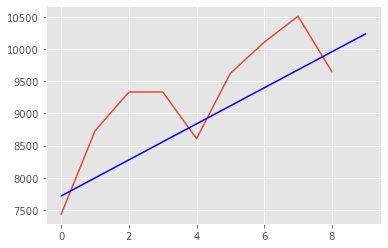

In [78]:
plt.plot(test)
plt.plot(predictions, color = 'blue')

In [79]:
#залишки
residuals = model_arima_fit.resid

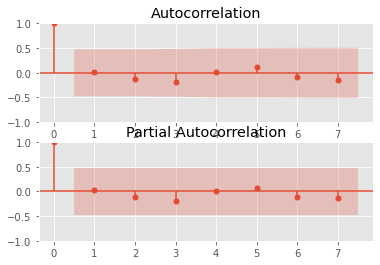

In [80]:
plt.figure()
plt.subplot(211)
plot_acf(residuals, lags=7, ax = plt.gca())
plt.subplot(212)

plot_pacf(residuals, method='ywmle', lags=7, ax = plt.gca())
plt.show()